In [1]:
import pandas as pd
import numpy as np
import datetime
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
# @github https://github.com/LKI/chinese-calendar
from chinese_calendar import is_workday
import matplotlib as mpl
import matplotlib.pyplot as plt
# notebook嵌入图片
%matplotlib inline
# 提高分辨率
%config InlineBackend.figure_format='retina'
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="/root/miniconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf")
import warnings
warnings.filterwarnings('ignore')

In [2]:
def time_map(time_str):  
    if time_str is None:  
        return ''  
    hour = int(time_str.split(':')[0])  
    if hour < 11:  
        return 'Breakfast'  
    elif hour < 17:  
        return 'Lunch'  
    else:  
        return 'Dinner'  

In [3]:
def isWork(date: list):
    """判断是否工作"""
    return is_workday(datetime.date(date[0], date[1], date[2]))


In [4]:
canteen=pd.read_csv('data/task1_2_1.csv',encoding='gbk')
canteen['Datetime'] = pd.to_datetime(canteen['Date'] + ' ' + canteen['Time'])  

# 对人员编号和datetime排序
canteen.sort_values(by=['CardNo','Time'])
# 记录与前一条时间差
canteen['Time_Diff'] = canteen.groupby('CardNo')['Datetime'].diff().dt.total_seconds().fillna(0)  
threshold = 10 * 60  # 10 分钟的秒数  
canteen['Same_Meal'] = (canteen['Time_Diff'] > threshold).cumsum() 
canteen_cleaned = canteen.groupby(['CardNo', 'Same_Meal']).first().reset_index()  
canteen_cleaned.drop(columns=['Same_Meal', 'Time_Diff'], inplace=True)  


In [5]:
# 得到map映射的用餐类型
have_meal = canteen_cleaned.copy()
have_meal['Meal'] = have_meal['Time'].apply(time_map)
have_meal = have_meal[have_meal.Meal != '']
display(have_meal)

,CardNo,Index,Sex,Major,AccessCardNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermNo,OperNo,Dept,Time,Datetime,Meal
0,180001,1,男,18国际金融,19762330,2019/4/21,7.0,0.0,28.4,206.0,消费,41.0,249.0,第四食堂,18:30,2019-04-21 18:30:00,Dinner
1,180001,1,男,18国际金融,19762330,2019/4/22,3.5,0.0,24.9,207.0,消费,19.0,236.0,第一食堂,09:40,2019-04-22 09:40:00,Breakfast
2,180001,1,男,18国际金融,19762330,2019/4/15,7.0,0.0,43.2,192.0,消费,62.0,2.0,第四食堂,11:43,2019-04-15 11:43:00,Lunch
3,180001,1,男,18国际金融,19762330,2019/4/23,2.0,0.0,15.9,209.0,消费,87.0,27.0,第二食堂,09:52,2019-04-23 09:52:00,Breakfast
4,180001,1,男,18国际金融,19762330,2019/4/23,7.0,0.0,8.9,210.0,消费,62.0,2.0,第四食堂,11:53,2019-04-23 11:53:00,Lunch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110262,184339,4339,女,18工业工程,11513762,2019/4/10,3.0,0.0,70.2,515.0,消费,7.0,27.0,第二食堂,07:44,2019-04-10 07:44:00,Breakfast
110263,184339,4339,女,18工业工程,11513762,2019/4/17,0.0,80.0,81.7,549.0,存款,204.0,237.0,财务处,16:32,2019-04-17 16:32:00,Lunch
110264,184339,4339,女,18工业工程,11513762,2019/4/19,4.5,0.0,71.8,553.0,消费,196.0,133.0,好利来食品店,08:16,2019-04-19 08:16:00,Breakfast
110265,184339,4339,女,18工业工程,11513762,2019/4/18,2.5,0.0,78.8,551.0,消费,118.0,204.0,第五食堂,18:13,2019-04-18 18:13:00,Dinner


In [6]:
# 绘制饼图为每一餐使用地点
meals = have_meal['Meal'].unique()  
meals

array(['Dinner', 'Breakfast', 'Lunch'], dtype=object)

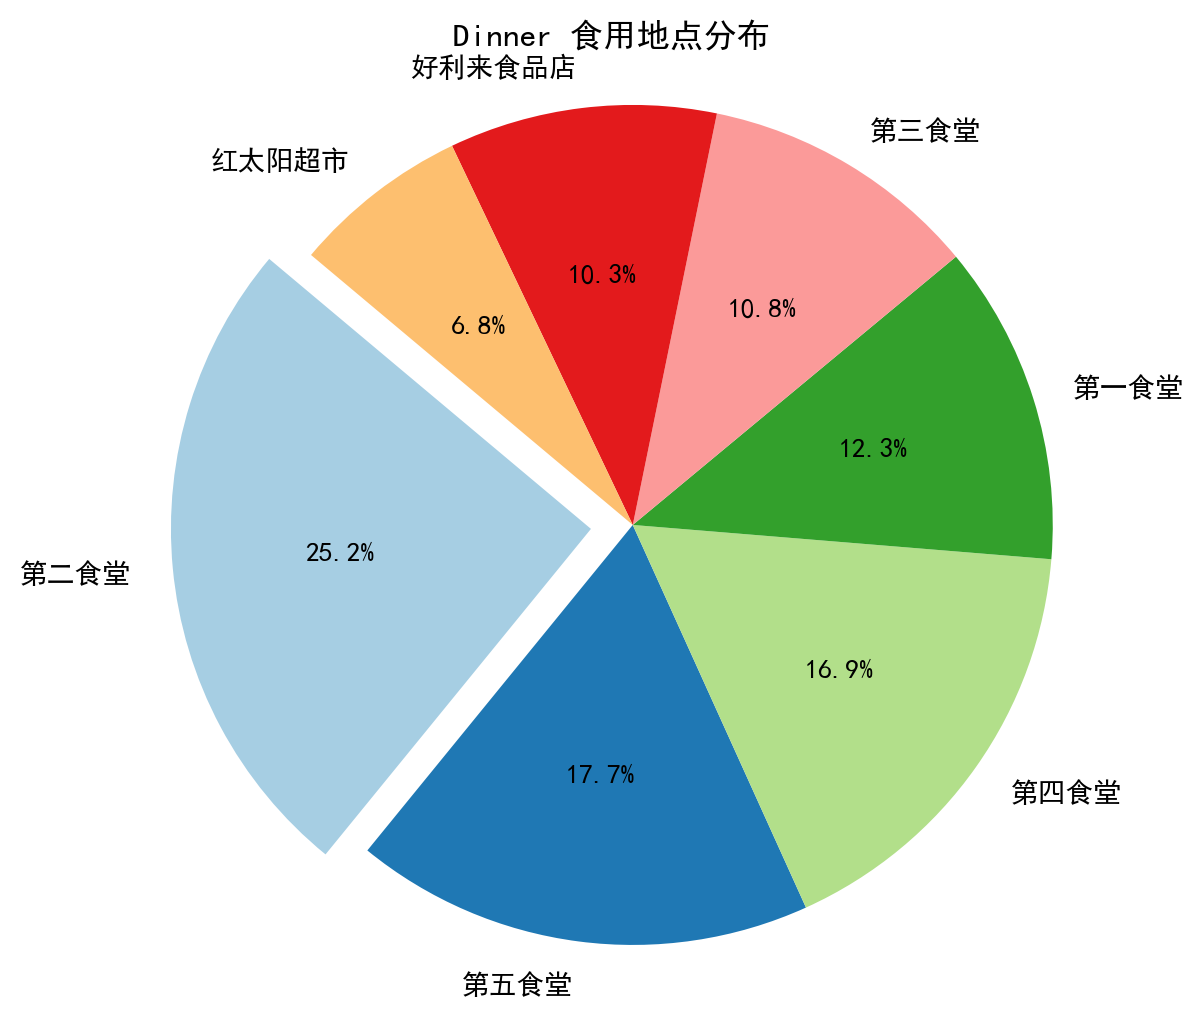

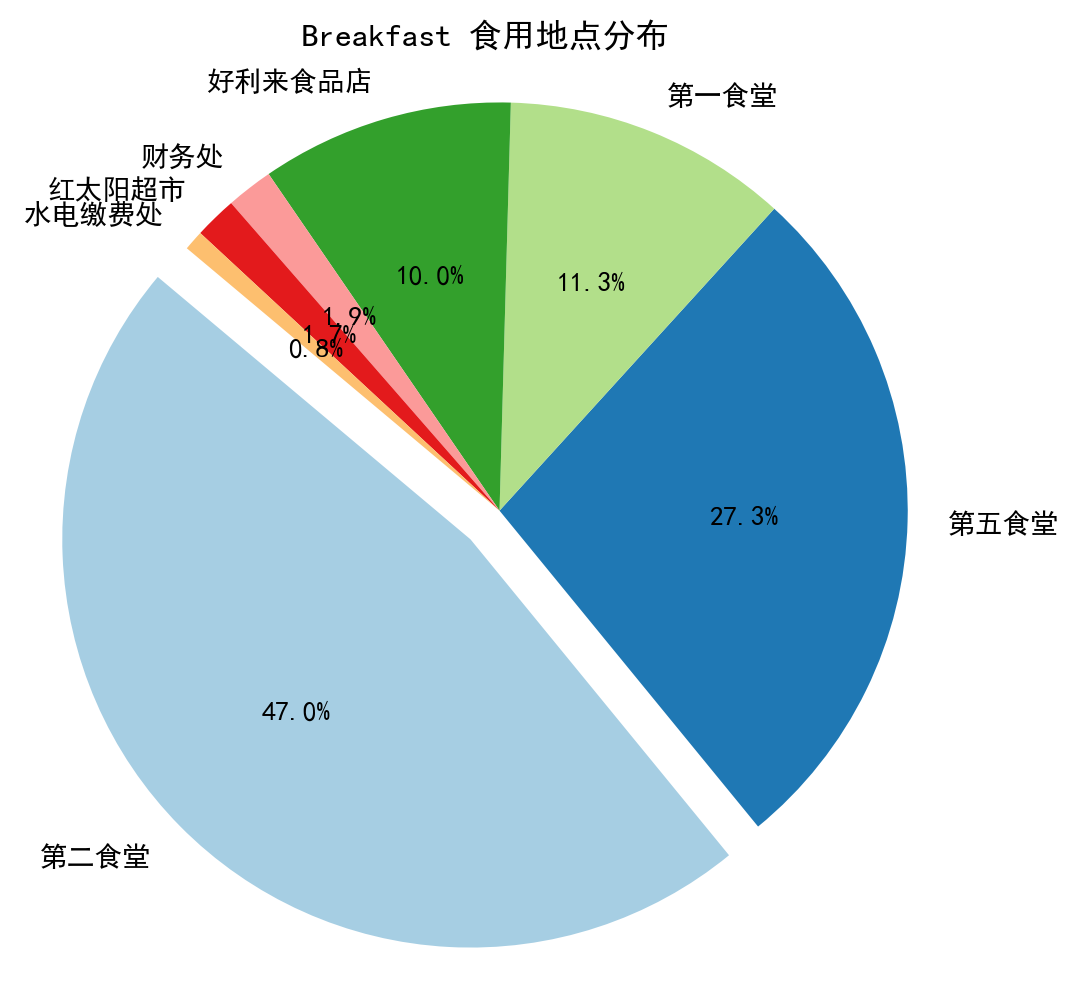

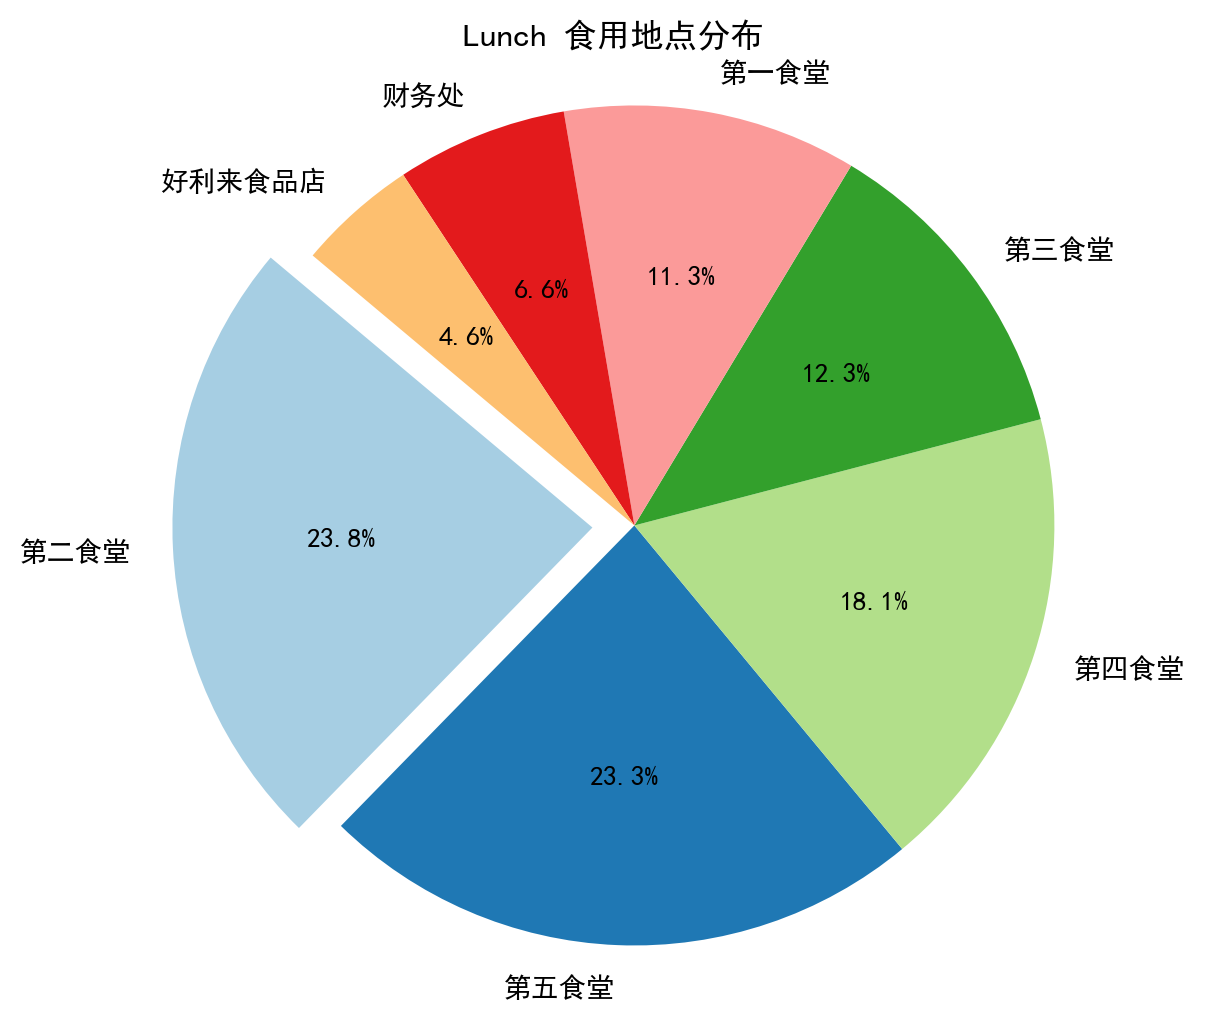

In [7]:
# 为每一餐分别绘制饼状图  
for meal in meals:  
    # 筛选出当前餐的地点数据  
    meal_data = have_meal[have_meal['Meal'] == meal]  
    
    # 统计每个地点的数量  
    location_counts = meal_data['Dept'].value_counts()  
    top_counts = location_counts.nlargest(7)  # 获取前7个地点  

    # 绘制饼状图  
    plt.figure(figsize=(6, 6))  
    
    # 设置颜色  
    colors = plt.cm.Paired(range(len(top_counts)))  # 使用Paired颜色映射  
    
    # 突出显示食用最多的地点  
    explode = [0.1 if count == top_counts.max() else 0 for count in top_counts]  

    plt.pie(top_counts, labels=top_counts.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)  
    
    plt.title(f'{meal} 食用地点分布')  
    plt.axis('equal')  # 保证饼图为圆形  
    plt.show()  

In [8]:
# 查看是否有显著差别
# 统计每个食堂在每个时间段的就餐人数  
meal_distribution = have_meal.groupby(['Dept', 'Meal']).size().unstack(fill_value=0)  
print(meal_distribution)  

Meal    Breakfast  Dinner  Lunch
Dept                            
人文社科            3      34     14
医务室            25      82     88
基础课部           32       3      0
外语系             0       1      0
好利来食品店       2822    2943   2299
宿管办             1       6     12
工商系部            0       0      1
教师食堂            0       0     24
机电系             0       0      3
水电缴费处         223     262    475
第一图书馆           8       2     30
第一教学楼           0       1      4
第一食堂         3188    3525   5646
第七教学楼           2      11     21
第三教学楼           1       1      7
第三食堂          221    3078   6131
第二图书馆          12       6     27
第二教学楼           5       0      0
第二食堂        13258    7213  11866
第五教学楼           1       3     16
第五食堂         7706    5048  11626
第六教学楼           2      10     20
第四教学楼           1       4     11
第四食堂          146    4842   9008
红太阳超市         473    1947   1416
自然科学书库          6       2     16
财务处           522     485   3284
财务部             4       6     19
飞凤轩宿管办    

In [9]:
from scipy import stats  

# 将数据转换为适合进行卡方检验的格式  
chi2_data = meal_distribution.values  

# 进行卡方检验  
chi2, p, dof, expected = stats.chi2_contingency(chi2_data)  

# 打印结果  
print(f'Chi-squared Value: {chi2}')  
print(f'P-value: {p}')  
print(f'Degrees of Freedom: {dof}') 

Chi-squared Value: 15855.31027869936
P-value: 0.0
Degrees of Freedom: 56
